# Import Libraries

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# import dataset 

In [2]:
df =  pd.read_csv('dataset/fake_reg.csv')

In [3]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


# pairplot

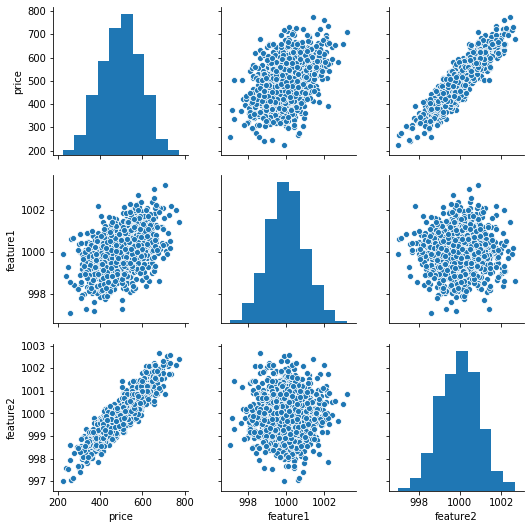

In [6]:
seaborn.pairplot(df)

# Split Data

In [7]:
X = df[['feature1','feature2']].values
y = df['price'].values

# Document of MinMaxScaler 

In [8]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [39]:
scaler = MinMaxScaler()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [42]:
X_train = scaler.transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_train.shape , X_test.shape

((700, 2), (300, 2))

In [45]:
X_train.min() , X_train.max()

(0.0, 1.0)

In [46]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [47]:
model = Sequential()

In [48]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4 , activation = 'relu'))

model.add(Dense(1))

In [49]:
model.compile(optimizer='rmsprop',loss = 'mse')

In [50]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256712.9784
Epoch 2/250
700/700 [==============================] - 0s 64us/sample - loss: 256610.3774
Epoch 3/250
700/700 [==============================] - 0s 61us/sample - loss: 256522.5377
Epoch 4/250
700/700 [==============================] - 0s 60us/sample - loss: 256423.7645
Epoch 5/250
700/700 [==============================] - 0s 63us/sample - loss: 256309.7859
Epoch 6/250
700/700 [==============================] - 0s 60us/sample - loss: 256181.7325
Epoch 7/250
700/700 [==============================] - 0s 63us/sample - loss: 256039.4396
Epoch 8/250
700/700 [==============================] - 0s 63us/sample - loss: 255882.3405
Epoch 9/250
700/700 [==============================] - 0s 70us/sample - loss: 255712.0673
Epoch 10/250
700/700 [==============================] - 0s 67us/sample - loss: 255526.9259
Epoch 11/250
700/700 [==============================] - 0s 63us/sample - loss: 

700/700 [==============================] - 0s 61us/sample - loss: 18155.3697
Epoch 92/250
700/700 [==============================] - 0s 64us/sample - loss: 14947.7674
Epoch 93/250
700/700 [==============================] - 0s 59us/sample - loss: 12058.8080
Epoch 94/250
700/700 [==============================] - 0s 59us/sample - loss: 9527.3832
Epoch 95/250
700/700 [==============================] - 0s 57us/sample - loss: 7356.8349
Epoch 96/250
700/700 [==============================] - 0s 59us/sample - loss: 5606.4287
Epoch 97/250
700/700 [==============================] - 0s 56us/sample - loss: 4306.0160
Epoch 98/250
700/700 [==============================] - 0s 56us/sample - loss: 3448.6233
Epoch 99/250
700/700 [==============================] - 0s 59us/sample - loss: 2978.3445
Epoch 100/250
700/700 [==============================] - 0s 59us/sample - loss: 2794.8690
Epoch 101/250
700/700 [==============================] - 0s 59us/sample - loss: 2744.5277
Epoch 102/250
700/700 [======

700/700 [==============================] - 0s 57us/sample - loss: 632.7109
Epoch 183/250
700/700 [==============================] - 0s 63us/sample - loss: 613.9869
Epoch 184/250
700/700 [==============================] - 0s 57us/sample - loss: 592.8817
Epoch 185/250
700/700 [==============================] - 0s 57us/sample - loss: 574.7444
Epoch 186/250
700/700 [==============================] - 0s 57us/sample - loss: 555.6049
Epoch 187/250
700/700 [==============================] - 0s 56us/sample - loss: 536.8869
Epoch 188/250
700/700 [==============================] - 0s 57us/sample - loss: 518.9828
Epoch 189/250
700/700 [==============================] - 0s 59us/sample - loss: 501.5515
Epoch 190/250
700/700 [==============================] - 0s 54us/sample - loss: 484.0118
Epoch 191/250
700/700 [==============================] - 0s 56us/sample - loss: 466.2303
Epoch 192/250
700/700 [==============================] - 0s 56us/sample - loss: 446.5397
Epoch 193/250
700/700 [============

In [52]:
model.history.history

{'loss': [256712.97839285716,
  256610.37741071428,
  256522.53767857142,
  256423.76446428572,
  256309.78589285715,
  256181.7325,
  256039.43964285715,
  255882.3405357143,
  255712.06732142856,
  255526.92589285714,
  255322.16464285715,
  255096.17392857143,
  254844.9992857143,
  254564.07732142857,
  254250.32839285713,
  253902.26794642856,
  253517.51178571428,
  253094.0738392857,
  252630.23375,
  252122.14857142858,
  251568.2269642857,
  250968.165,
  250314.70205357144,
  249610.62508928572,
  248848.4558035714,
  248028.30017857143,
  247149.235625,
  246209.62875,
  245194.25892857142,
  244118.35642857142,
  242967.14732142858,
  241739.77160714284,
  240436.76571428572,
  239061.81625,
  237593.12875,
  236038.43330357142,
  234395.39767857143,
  232668.4342857143,
  230848.51767857143,
  228930.7469642857,
  226920.1463392857,
  224811.431875,
  222589.90383928572,
  220281.08669642857,
  217842.904375,
  215295.45919642856,
  212653.4825892857,
  209905.97919642858,

In [53]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Traing loss per Echop')

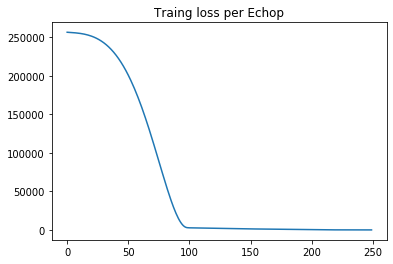

In [54]:
seaborn.lineplot(x=range(len(loss)),y=loss)
plt.title("Traing loss per Echop")

In [55]:
model.evaluate(X_test,y_test,verbose=0)

25.27241500854492

In [56]:
model.evaluate(X_train,y_train,verbose=0)

24.190641316005163

In [57]:
test_prediction = model.predict(X_test)

In [58]:
df = pd.DataFrame(y_test,columns=['Test Y'])

In [59]:
df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [60]:
test_prediction.shape

(300, 1)

In [62]:
test_prediction = pd.Series(test_prediction.reshape(300,))

In [64]:
df = pd.concat([df,test_prediction],axis=1)

In [66]:
df.columns = ['Test y','Model Prediction']

In [67]:
df

,Test y,Model Prediction
0,402.296319,405.912018
1,624.156198,622.957947
2,582.455066,591.618408
3,578.588606,572.167297
4,371.224104,367.910736
...,...,...
295,525.704657,529.189209
296,502.909473,516.095215
297,612.727910,609.094604
298,417.569725,417.297455


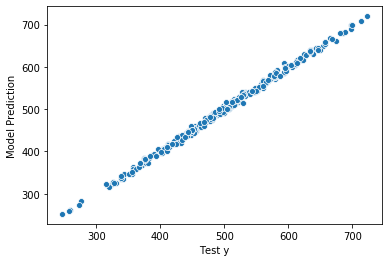

In [68]:
seaborn.scatterplot(x = 'Test y', y= 'Model Prediction',data=df)

In [69]:
df['Error'] = df['Test y'] - df['Model Prediction']

In [70]:
df

,Test y,Model Prediction,Error
0,402.296319,405.912018,-3.615699
1,624.156198,622.957947,1.198252
2,582.455066,591.618408,-9.163342
3,578.588606,572.167297,6.421309
4,371.224104,367.910736,3.313368
...,...,...,...
295,525.704657,529.189209,-3.484552
296,502.909473,516.095215,-13.185742
297,612.727910,609.094604,3.633306
298,417.569725,417.297455,0.272270


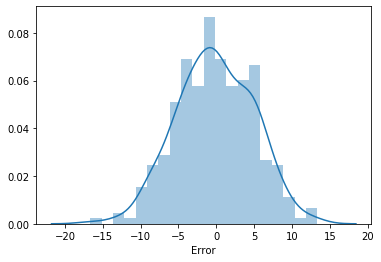

In [72]:
seaborn.distplot(df['Error'],bins=20)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
mean_absolute_error(df['Test y'],df['Model Prediction'])

4.062286089946004

In [81]:
mean_squared_error(df['Test y'],df['Model Prediction'])**0.5

5.027168031598164

In [84]:
newgam = [[988,1000]]

In [85]:
scaler.transform(newgam)

array([[-1.50789111,  0.53968792]])

In [86]:
newgam = scaler.transform(newgam)

In [87]:
model.predict(newgam)

array([[57.73028]], dtype=float32)

# save and load data in .h5

In [88]:
model.save("my_model.h5")

In [89]:
from tensorflow.keras.models import load_model

In [90]:
later_model = load_model("my_model.h5")

In [91]:
later_model.predict(newgam)

array([[57.73028]], dtype=float32)